In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import KernelPCA, PCA

from factor_analyzer import FactorAnalyzer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn import preprocessing  
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Data Visualization

C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


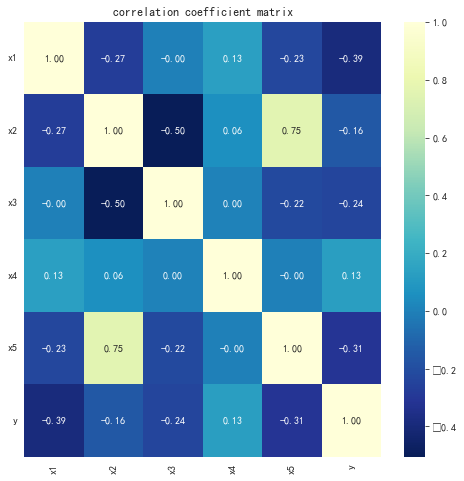

In [2]:
data=pd.read_excel('airfoil_self_noise.xlsx')
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})   # 解决Seaborn中文显示问题
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),cmap="YlGnBu_r",annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.title('correlation coefficient matrix')
plt.savefig('correlation coefficient.jpg', dpi=300,bbox_inches='tight')
plt.show()

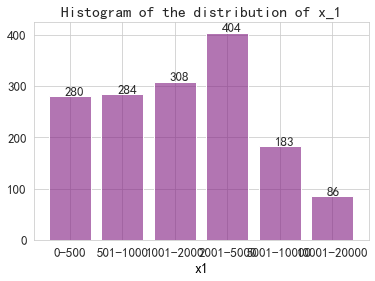

In [3]:
type=['0-500','501-1000','1001-2000','2001-5000','5001-10000','10001-20000']
len_num=[280,284,308,404,183,86]
plt.rcParams['font.size']=13
# Choose the height of the bars
height=len_num
 
# Choose the names of the bars
bars =  type
y_pos = np.arange(len(bars))
 
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2-0.1, 1.01*height, '%s' % int(height))
# Create bars
a=plt.bar(y_pos, height,color=(0.5,0.1,0.5,0.6))
autolabel(a)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('x1', fontweight='bold', color = 'black', fontsize='14')
plt.title('Histogram of the distribution of x_1')
# Show graphic
params = {
    'figure.figsize': '10,4'
}
plt.rcParams.update(params)
plt.savefig('.jpg', dpi=300,bbox_inches='tight') 
plt.show()

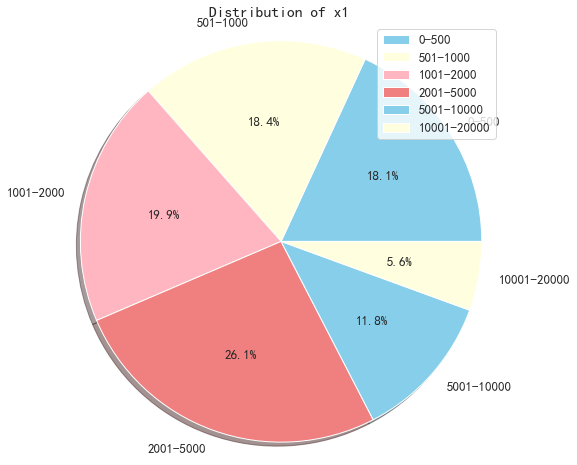

In [4]:

type=['0-500','501-1000','1001-2000','2001-5000','5001-10000','10001-20000']
len_num=[280,284,308,404,183,86]
labels = type
explode = [0,0,0,0,0,0]
fig1, ax1 = plt.subplots(1,1,figsize=(8,8))
ax1.pie(len_num, explode = explode, labels = labels, autopct="%3.1f%%",startangle=0, shadow = True, colors = ['skyblue','lightyellow', 'lightpink','lightcoral'])
ax1.axis('equal')
plt.legend()
plt.title('Distribution of x1')
plt.savefig('.jpg', dpi=300,bbox_inches='tight') 
plt.show()

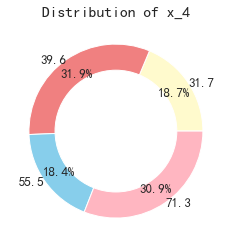

In [5]:
names=['31.7','39.6','55.5','71.3']
size=[281,480,277,465]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
explode = [0,0,0,0]
plt.pie(size, explode=explode,labels=names,autopct="%3.1f%%", labeldistance=1.0, colors=['lemonchiffon','lightcoral','skyblue','lightpink'] ,pctdistance=0.8)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of x_4')
params = {
    'figure.figsize': '6,6'
}
plt.rcParams.update(params) 
plt.savefig('.jpg', dpi=300,bbox_inches='tight')
plt.show()

C:\Users\jingu\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jingu\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


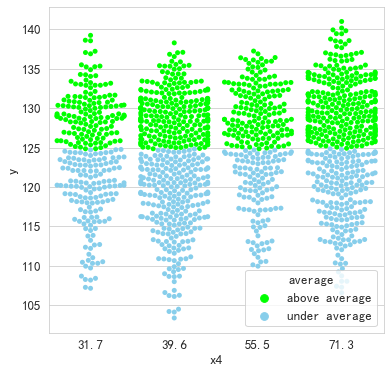

In [6]:
ave = sum(data.y)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.y]
sns.swarmplot(x='x4', y = 'y', hue = 'average',data= data,palette={'above average':'lime', 'under average': 'skyblue'})
plt.savefig('graph.png')

In [7]:
df = pd.read_excel('airfoil_self_noise.xlsx')
df.head()

df.shape   
df.info() 
#df.describe().T
#print(df)
#scaler = StandardScaler()
X_input = df.dropna()
scaler = MinMaxScaler()

X_input = scaler.fit_transform(X_input)
X_input = pd.DataFrame(X_input)

#X_input = pd.concat([X_input,df['quality']],axis=1)
#X_input.columns = df.columns.tolist()
X_input.columns = ["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side displacement thickness","Scaled sound pressure level"] #添加自定义的columns的名字


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1503 non-null   int64  
 1   x2      1503 non-null   float64
 2   x3      1503 non-null   float64
 3   x4      1503 non-null   float64
 4   x5      1503 non-null   float64
 5   y       1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [8]:
#Split data into training and test sets
#X_input = np.array(X_input,type(float))
X = X_input.iloc[:,0:5]
print(X)
y = X_input.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) #split the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

      Frequency  Angle of attack  Chord length  Free-stream velocity  \
0      0.030303         0.000000      1.000000              1.000000   
1      0.040404         0.000000      1.000000              1.000000   
2      0.053030         0.000000      1.000000              1.000000   
3      0.070707         0.000000      1.000000              1.000000   
4      0.090909         0.000000      1.000000              1.000000   
...         ...              ...           ...                   ...   
1498   0.116162         0.702703      0.272727              0.199495   
1499   0.148990         0.702703      0.272727              0.199495   
1500   0.191919         0.702703      0.272727              0.199495   
1501   0.242424         0.702703      0.272727              0.199495   
1502   0.308081         0.702703      0.272727              0.199495   

      Suction side displacement thickness  
0                                0.039005  
1                                0.039005  
2  

((1052, 5), (1052,), (451, 5), (451,))

C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


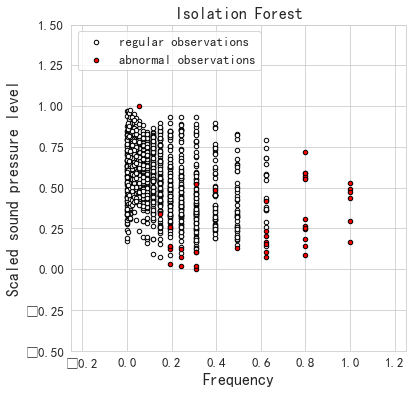

Frequency                              1464
Angle of attack                        1464
Chord length                           1464
Free-stream velocity                   1464
Suction side displacement thickness    1464
Scaled sound pressure level            1464
dtype: int64
Frequency                              39
Angle of attack                        39
Chord length                           39
Free-stream velocity                   39
Suction side displacement thickness    39
Scaled sound pressure level            39
dtype: int64


In [41]:
clf = IsolationForest(max_samples=256,contamination=0.01)
#train classifier
#X_input = data[:,0:11]    

clf.fit(X_input)
#Calculate anomaly score
#score = clf.score_samples(X_input)

# Output the result of decision_function: greater than 0 means that the reliability of the positive sample is greater than that of the negative sample, otherwise the reliability is lower than that of the negative sample.

scores = clf.decision_function(X_input)
#print(scores)

X_inliner= []
X_outliner= []
X_select= []
X_abandon= []
scores_num = 0
X_train_size= df.shape[0]-1
while scores_num <= X_train_size:
    if scores[scores_num] >= 0.02:
        X_inliner.append([X_input.iloc[scores_num,0], X_input.iloc[scores_num,5]])
        X_select.append(X_input.iloc[scores_num,:])
    else:
            X_outliner.append([X_input.iloc[scores_num,0], X_input.iloc[scores_num,5]])
            X_abandon.append(X_input.iloc[scores_num,:])
    scores_num = scores_num + 1



X_inliner = np.array(X_inliner)
X_outliner = np.array(X_outliner)
#print (X_inliner)
#print (X_outliner)
X_select = pd.DataFrame(X_select)
X_abandon = pd.DataFrame(X_abandon)
#print (X_select)
#print (X_abandon)



plt.title("Isolation Forest",size=16)
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

a = plt.scatter(X_inliner[:, 0], X_inliner[:, 1], c='white',
                 s=20, edgecolor='k')

b = plt.scatter(X_outliner[:, 0], X_outliner[:, 1], c='red',s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-0.25, 1.25))
plt.ylim((-0.5, 1.5))
plt.legend([a, b],["regular observations", "abnormal observations"],loc="upper left")
plt.xlabel("Frequency",size=16)
plt.ylabel("Scaled sound pressure level",size=16)
plt.show()
print (X_select.count())
print (X_abandon.count())

# PCA

[0.16 0.15 0.07 0.02]


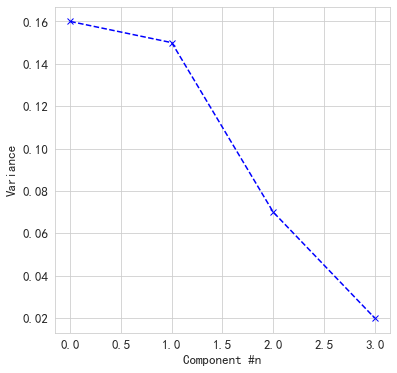

,0,1,2,3
0,-0.14243,0.83142,0.18241,-0.10891
1,-0.14258,0.83209,0.18045,-0.09950
2,-0.14278,0.83292,0.17801,-0.08774
3,-0.14306,0.83408,0.17458,-0.07128
4,-0.14337,0.83542,0.17067,-0.05246
...,...,...,...,...
1459,0.24961,-0.59313,0.53223,0.17056
1460,0.24930,-0.59179,0.52831,0.18937
1461,0.24890,-0.59013,0.52342,0.21290
1462,0.24839,-0.58796,0.51706,0.24347


In [42]:
X = X_select.loc[:,"Frequency":"Suction side displacement thickness"].reset_index(drop=True)
Y = X_select["Scaled sound pressure level"].reset_index(drop=True)

pca = PCA(n_components=X.shape[1]-1)  # Create a principal component analysis object, set the principal component number as the number of sample features - 1

reduced_x = pca.fit_transform(X)  # Create a principal component analysis model based on standardized data to reduce the dimension of the sample

covper = pca.explained_variance_  # The variance value of each principal component after dimensionality reduction
covper = np.round(covper, 2)  # Adjust accuracy
print(covper)

# draw a gravel diagram

plt.plot(covper, 'bx--')
plt.xlabel('Component #n')
plt.ylabel('Variance')
plt.show()

contribution = pca.explained_variance_ratio_  # The proportion of the variance value of each principal component after dimensionality reduction to the total variance value (contribution rate)
contribution = np.round(contribution, 5)
pd.DataFrame(contribution)  # output contribution rate

pd.DataFrame(np.round(reduced_x, 5))   # output principal components

C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


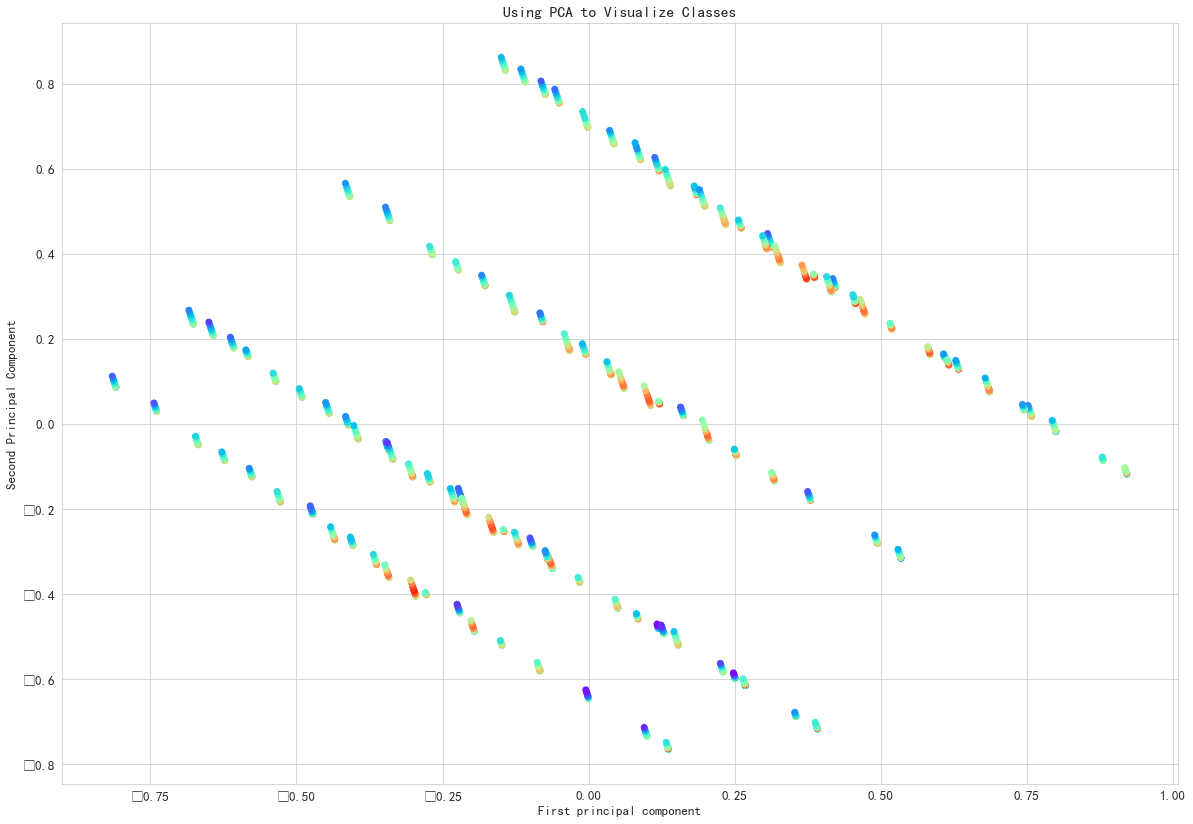

In [43]:
#Preprocessing in preparation for PCA: Standardizing the predictor variables
#X_pca = StandardScaler().fit_transform(X)

#Fit PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_pca.shape

plt.figure(figsize=(20,14))
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("Using PCA to Visualize Classes")
plt.show()

In [44]:
print("components: ", pca.components_, "\n")
print("explained variance: ", pca.explained_variance_, "\n")
exp_var_rat = pca.explained_variance_ratio_
print("explained variance ratio: ", exp_var_rat)
total = sum(exp_var_rat[0:8])
print("total explained variance ratio: ", total)

components:  [[-0.01559471  0.45022903 -0.52713655  0.67002814  0.26502827]
 [ 0.065941   -0.36241733  0.50642723  0.74025913 -0.24464941]
 [-0.19370626  0.44095861  0.65195126 -0.01942575  0.58533374]] 

explained variance:  [0.15737851 0.15113927 0.06618427] 

explained variance ratio:  [0.39209747 0.37655285 0.16489344]
total explained variance ratio:  0.9335437609996435


In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#X.columns = ["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side displacement thickness"] #添加自定义的columns的名字
#Y.columns = ["Scaled sound pressure level"]
#y.columns = ["Scaled sound pressure level"]
scaler = MinMaxScaler()
#X_pos = scaler.fit_transform(X)
X_pos = pd.DataFrame(X)



#apply SelectKBest class to extract top best features
bestFeatures = SelectKBest(score_func=chi2, k=3)
output=(10*Y).astype(int)
bestFeaturesFit = bestFeatures.fit(X_pos,output)
dfscores = pd.DataFrame(bestFeaturesFit.scores_)  #Store predictor scores in a column 
dfcolumns = pd.DataFrame(X.columns)  #Store predictor variable names in a column

# #concatenate scores with predictor names
predScores = pd.concat([dfcolumns,dfscores],axis=1)
predScores.columns = ['Predictor','Score']   #naming the dataframe columns
print(predScores.nlargest(13,'Score'))       #print top (by score) 10 features



                             Predictor      Score
4  Suction side displacement thickness  46.997931
0                            Frequency  40.834130
2                         Chord length  31.604873
3                 Free-stream velocity  17.564633
1                      Angle of attack  12.280953


In [46]:
X_PCA = X_pos.loc[:,["Frequency","Chord length","Suction side displacement thickness"]]

X_PCA

,Frequency,Chord length,Suction side displacement thickness
0,0.030303,1.000000,0.039005
1,0.040404,1.000000,0.039005
2,0.053030,1.000000,0.039005
3,0.070707,1.000000,0.039005
4,0.090909,1.000000,0.039005
...,...,...,...
1459,0.070707,0.272727,0.904111
1460,0.090909,0.272727,0.904111
1461,0.116162,0.272727,0.904111
1462,0.148990,0.272727,0.904111


# Regression

In [47]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

datas = X_select
y = datas.iloc[:, -1] 
x = datas.iloc[:, 0:4] 
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() 
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:     Scaled sound pressure level   R-squared:                       0.468
Model:                                     OLS   Adj. R-squared:                  0.467
Method:                          Least Squares   F-statistic:                     321.2
Date:                         Mon, 20 Mar 2023   Prob (F-statistic):          2.62e-198
Time:                                 19:48:05   Log-Likelihood:                 928.41
No. Observations:                         1464   AIC:                            -1847.
Df Residuals:                             1459   BIC:                            -1820.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

C:\Users\jingu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Ridge Regression

In [53]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [54]:
y = X_select.iloc[:, -1] 
X = X_select.iloc[:,0:4]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) #
ridge=Ridge(alpha=0.4)
ridge.fit(X_train,y_train)
print("Training dataset score："+str(r2_score(y_train,ridge.predict(X_train))))
print("Testing dataset score："+str(r2_score(y_test,ridge.predict(x_test))))

Training dataset score：0.46529075488423655
Testing dataset score：0.4737186686401722


# Lasso Regression

In [55]:
from sklearn.linear_model import Lasso

In [56]:
y = X_select.iloc[:, -1] 
X = X_select.iloc[:,0:4]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) 
lasso=Lasso(alpha=0.4)
lasso.fit(X_train,y_train)
print("Training dataset score："+str(r2_score(y_train,lasso.predict(X_train))))
print("Testing dataset score："+str(r2_score(y_test,lasso.predict(x_test))))

Training dataset score：0.0
Testing dataset score：-0.0007745071450016017


# PCR

In [57]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

datas = X_select
y = datas.iloc[:, -1] 
x = X_pca
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() 
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:     Scaled sound pressure level   R-squared:                       0.167
Model:                                     OLS   Adj. R-squared:                  0.166
Method:                          Least Squares   F-statistic:                     97.77
Date:                         Mon, 20 Mar 2023   Prob (F-statistic):           1.14e-57
Time:                                 19:48:31   Log-Likelihood:                 600.05
No. Observations:                         1464   AIC:                            -1192.
Df Residuals:                             1460   BIC:                            -1171.
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Machine Learning

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [59]:
y = X_select.iloc[:, -1] 
X = X_select.iloc[:,0:4]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10) 
from sklearn.preprocessing import MinMaxScaler
# Training dataset MinMaxSscaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
y_train=y_train.values.reshape(-1,1)
min_max_scaler.fit(y_train)
y_train = min_max_scaler.transform(y_train)
# Testing dataset MinMaxSscaler
min_max_scaler.fit(x_test)
x_test = min_max_scaler.transform(x_test)
y_test=y_test.values.reshape(-1,1)
min_max_scaler.fit(y_test)
y_test = min_max_scaler.transform(y_test)

In [60]:
#Decision Tree
DTR = DecisionTreeRegressor(max_depth=30)
DTR.fit(X_train,y_train)
y_pre_DTR = DTR.predict(x_test)
DTR_score=r2_score(y_test,y_pre_DTR)
print(DTR_score)

0.7420014985628866


In [61]:
#SVR
SUPPOT = SVR()
SUPPOT.fit(X_train,y_train)
y_pre_SVR = SUPPOT.predict(x_test)
SVR_score=r2_score(y_test,y_pre_SVR)
print(SVR_score)

0.6572965170119449


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [62]:
#Randomforest
rf = RandomForestRegressor(n_estimators=30,max_depth=20)
rf.fit(X_train,y_train)
y_pre_rf = rf.predict(x_test)
rf_score=r2_score(y_test,y_pre_rf)
print(rf_score)

0.7945131668641667


C:\Users\jingu\AppData\Local\Temp/ipykernel_1632/2746876608.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [63]:
#AdaBoostRegression
adb = AdaBoostRegressor()
adb.fit(X_train,y_train)
y_pre_adb = adb.predict(x_test)
adb_score=r2_score(y_test,y_pre_adb)
print(adb_score)

0.5828780219296281


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [64]:
#GradientBoostingRegression
gbtr = GradientBoostingRegressor()
gbtr.fit(X_train,y_train)
y_pre_gbtr = gbtr.predict(x_test)
gbtr_score=r2_score(y_test,y_pre_gbtr)
print(gbtr_score)

0.7039760069949415


C:\Users\jingu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
